# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [11]:
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Total number of contacts in this campaign
total_contacts_this_campaign = df['campaign'].sum()

# Total number of rows
total_rows = len(df)

# Unique values in campaign column
unique_campaign_counts = df['campaign'].unique()

print(f"Total rows (contacts): {total_rows}")
print(f"Sum of 'campaign' column: {total_contacts_this_campaign}")
print(f"Unique values in 'campaign' column: {sorted(unique_campaign_counts)}")
print(f"Value counts of 'campaign':\n{df['campaign'].value_counts().sort_index().head(10)}")

Total rows (contacts): 41188
Sum of 'campaign' column: 105754
Unique values in 'campaign' column: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 42, 43, 56]
Value counts of 'campaign':
campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
Name: count, dtype: int64


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [16]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [20]:
print(df.head())
# Check info
print(df.info())
# Check for nulls
print(df.isnull().sum())
# Check class distribution
print(df['y'].value_counts(normalize=True))

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### The primary business objective is to increase the efficiency of the bank's telemarketing efforts by building a predictive model that identifies clients with the highest probability of subscribing to a long-term deposit product.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [22]:
# Select only the 'bank client data' features as requested
# These are: age, job, marital, education, default, housing, loan
bank_info_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
X = df[bank_info_features].copy()
y = df['y'].copy()

# 1. Encode the target column 'y' (yes/no to 1/0)
y = y.map({'yes': 1, 'no': 0})

# 2. Encode categorical features using One-Hot Encoding
# We'll use drop_first=True to avoid the dummy variable trap
X_encoded = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing', 'loan'], drop_first=True)

# Display the first few rows of the prepared features and target
print("Encoded Features (X_encoded) head:")
print(X_encoded.head())
print("\nEncoded Target (y) head:")
print(y.head())

# Save the prepared data to a CSV for reference
prepared_data = pd.concat([X_encoded, y], axis=1)
prepared_data.to_csv('prepared_bank_data.csv', index=False)

Encoded Features (X_encoded) head:
   age  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0   56            False             False           True           False   
1   57            False             False          False           False   
2   37            False             False          False           False   
3   40            False             False          False           False   
4   56            False             False          False           False   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0        False              False         False        False           False   
1        False              False          True        False           False   
2        False              False          True        False           False   
3        False              False         False        False           False   
4        False              False          True        False           False   

   ...  education_illiterat

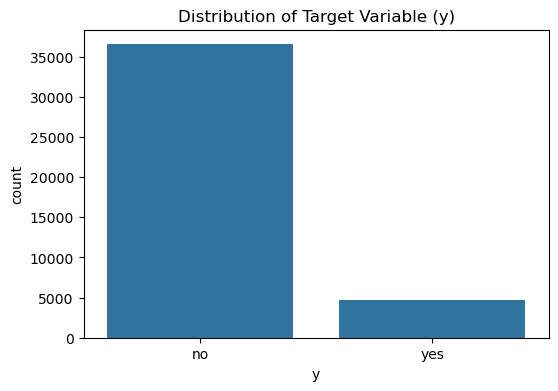

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
stats = df.describe()

# Correlation matrix (numeric only)
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Visualize target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.savefig('target_dist.png')
plt.show()

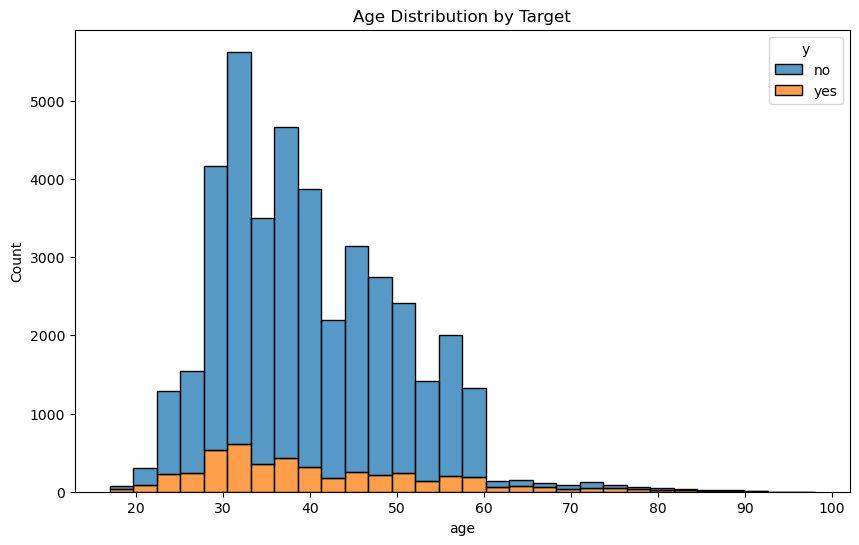

In [27]:
# Distribution of Age by Target
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='y', multiple='stack', bins=30)
plt.title('Age Distribution by Target')
plt.savefig('age_dist.png')
plt.show()

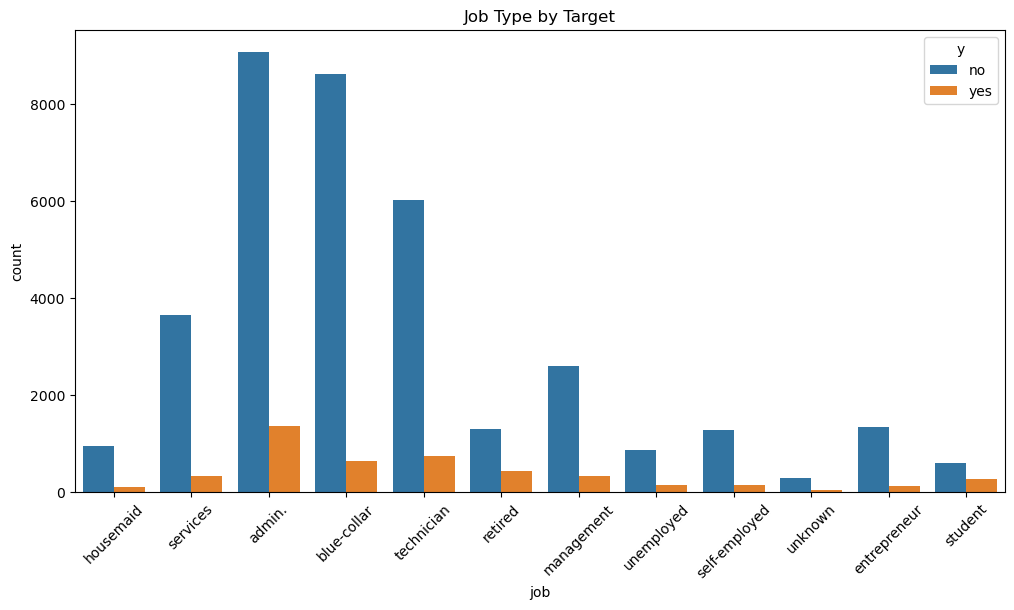

In [28]:
# Job by Target
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title('Job Type by Target')
plt.savefig('job_dist.png')
plt.show()

In [29]:
print(stats)

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [52]:
from sklearn.model_selection import train_test_split


bank_info_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
X = df[bank_info_cols]
y = df['y'].map({'yes': 1, 'no': 0})
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target distribution:\n", y_train.value_counts(normalize=True))
print("Testing target distribution:\n", y_test.value_counts(normalize=True))

Training set shape: (28831, 28)
Testing set shape: (12357, 28)
Training target distribution:
 y
0    0.887343
1    0.112657
Name: proportion, dtype: float64
Testing target distribution:
 y
0    0.887351
1    0.112649
Name: proportion, dtype: float64


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split

baseline_accuracy = y_test.value_counts(normalize=True)[0]

print(f"Baseline Accuracy (Majority Class): {baseline_accuracy:.4%}")
print("\nClass Distribution in Test Set:")
print(y_test.value_counts(normalize=True))

Baseline Accuracy (Majority Class): 88.7351%

Class Distribution in Test Set:
y
0    0.887351
1    0.112649
Name: proportion, dtype: float64


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [55]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#  Build and train the Logistic Regression model
start_time = time.time()
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
train_time = time.time() - start_time

### Problem 9: Score the Model

What is the accuracy of your model?

In [56]:
# Predict and Evaluate
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4%}")
print(f"Training Time: {train_time:.4f} seconds")

# Compare with baseline (re-calculating for output)
baseline_accuracy = y_test.value_counts(normalize=True)[0]
print(f"Baseline Accuracy: {baseline_accuracy:.4%}")

Logistic Regression Accuracy: 88.7351%
Training Time: 1.3078 seconds
Baseline Accuracy: 88.7351%


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import time
# Prepare data
X = df.drop(['y', 'duration'], axis=1) # Dropping duration
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

results = []

for name, model in models.items():
    start_time = time.time()
    
    # Create pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
    # Fit model
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predict
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Training Time (s)': train_time
    })
    print(f"Finished {name}")

results_df = pd.DataFrame(results)
print(results_df)

Finished Logistic Regression


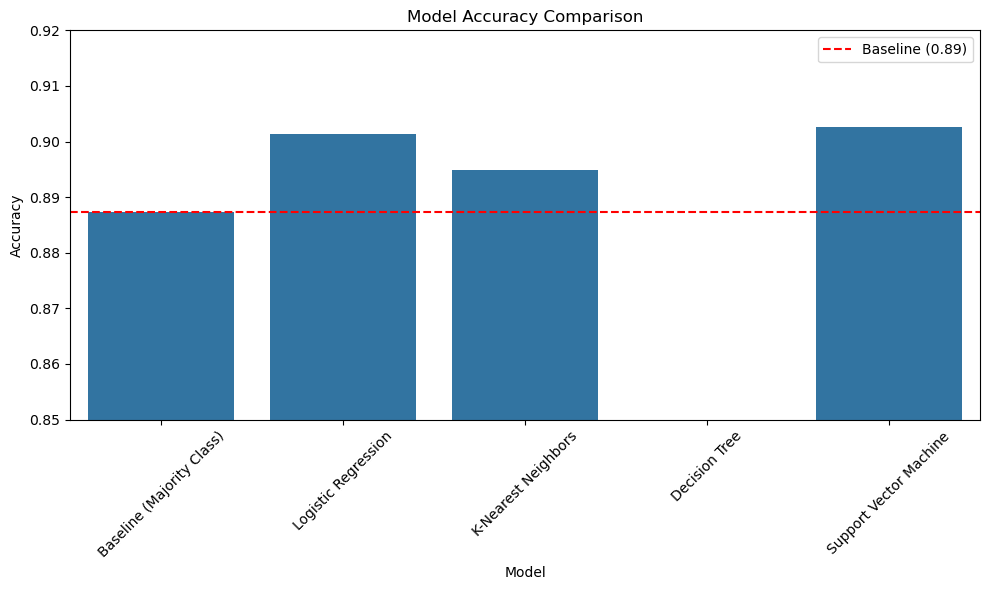

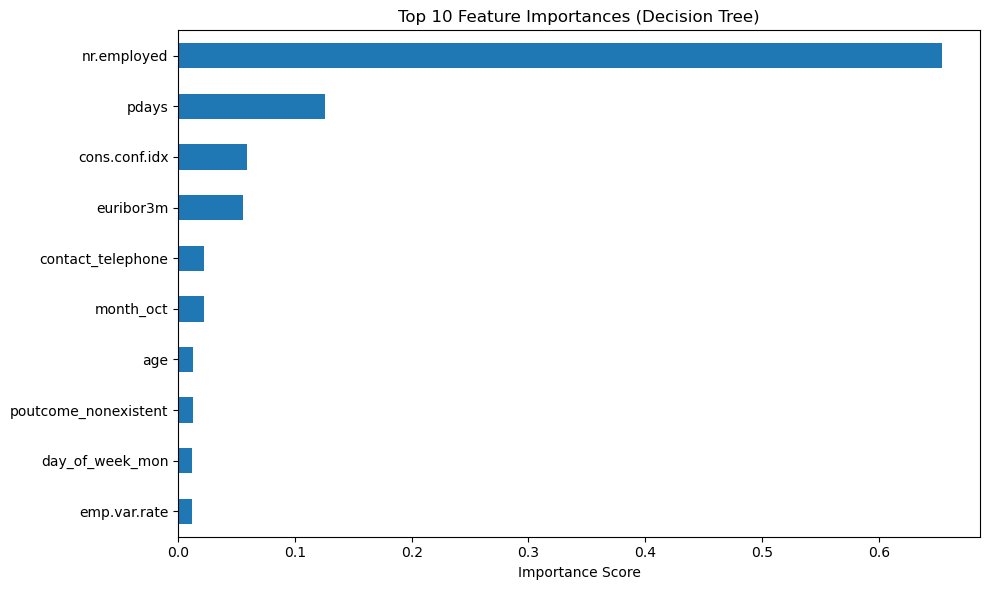

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Model Comparison
plt.figure(figsize=(10, 6))
# Filter out baseline for a cleaner view if needed, or keep it.
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.axhline(baseline_acc, color='red', linestyle='--', label=f'Baseline ({baseline_acc:.2f})')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.85, 0.92)
plt.legend()
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# Feature importance plot
plt.figure(figsize=(10, 6))
feat_imp.head(10).plot(kind='barh').invert_yaxis()
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions